In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset-malaria/cell_images/Uninfected/C203ThinF_IMG_20151029_102123_cell_51.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C238NThinF_IMG_20151207_114038_cell_84.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C119P80ThinF_IMG_20151002_124304_cell_112.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C39P4thinF_original_IMG_20150622_111723_cell_33.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C101P62ThinF_IMG_20150918_151149_cell_63.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C180P141NThinF_IMG_20151201_165601_cell_115.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C95P56ThinF_IMG_20150821_171603_cell_75.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C236ThinF_IMG_20151127_102516_cell_177.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C125P86ThinF_IMG_20151004_102053_cell_83.png
/kaggle/input/dataset-malaria/cell_images/Uninfected/C49P10thinF_IMG_20150724_102330_cell_160.png
/kaggle/input/dat

In [37]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

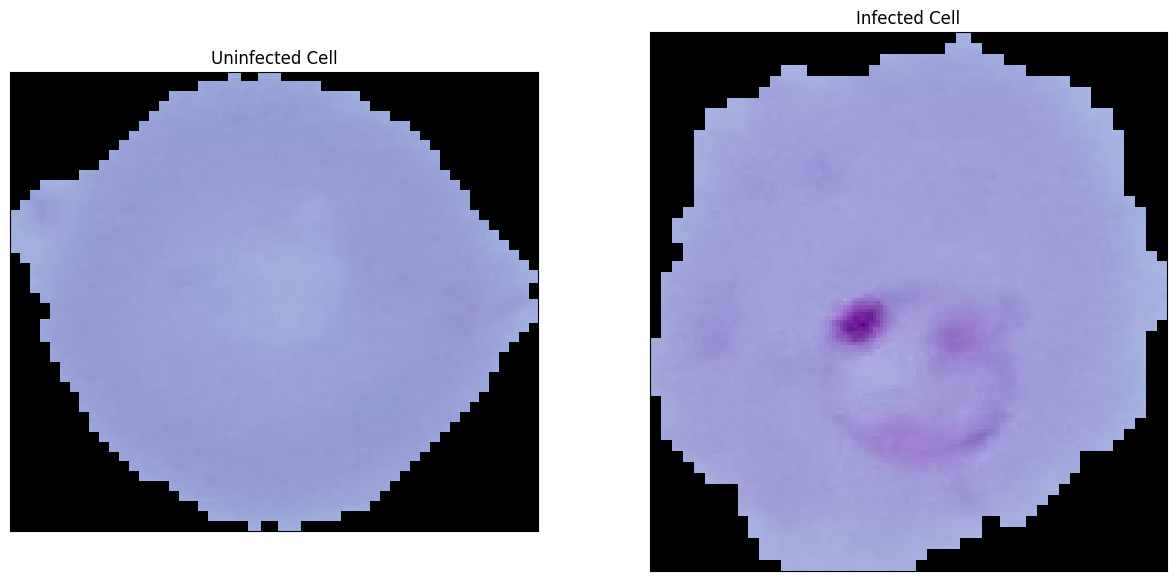

In [39]:
import cv2

upic='/kaggle/input/dataset-malaria/cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'
apic='/kaggle/input/dataset-malaria/cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.figure(1, figsize = (15 , 7))
plt.subplot(1 , 2 , 1)
plt.imshow(cv2.imread(upic))
plt.title('Uninfected Cell')
plt.xticks([]) , plt.yticks([])

plt.subplot(1 , 2 , 2)
plt.imshow(cv2.imread(apic))
plt.title('Infected Cell')
plt.xticks([]) , plt.yticks([])

plt.show()

In [40]:
width = 128
height = 128

In [41]:
datagen = ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [55]:
trainDatagen = datagen.flow_from_directory(directory='/kaggle/input/dataset-malaria/cell_images/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [56]:
valDatagen = datagen.flow_from_directory(directory='/kaggle/input/dataset-malaria/cell_images/cell_images',
                                           target_size=(width,height),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


In [57]:
model = Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(128,128,3)))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [59]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 63, 63, 16)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 63, 63, 16)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 30, 30, 32)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 30, 30, 32)       

In [60]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [61]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [62]:
history = model.fit_generator(generator = trainDatagen,
                             steps_per_epoch = len(trainDatagen),
                              epochs =10,
                              validation_data = valDatagen,
                              validation_steps=len(valDatagen),
                             callbacks=[early_stop])

Epoch 1/10


/tmp/ipykernel_32/3906761593.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator = trainDatagen,


1378/1378 [==============================] - 224s 161ms/step - loss: 0.3991 - accuracy: 0.8069 - val_loss: 0.5174 - val_accuracy: 0.8931
Epoch 2/10
1378/1378 [==============================] - 222s 161ms/step - loss: 0.1750 - accuracy: 0.9492 - val_loss: 0.2555 - val_accuracy: 0.9238
Epoch 3/10
1378/1378 [==============================] - 222s 161ms/step - loss: 0.1560 - accuracy: 0.9547 - val_loss: 0.1789 - val_accuracy: 0.9419
Epoch 4/10
1378/1378 [==============================] - 219s 159ms/step - loss: 0.1456 - accuracy: 0.9558 - val_loss: 0.1870 - val_accuracy: 0.9345
Epoch 5/10
1378/1378 [==============================] - 216s 157ms/step - loss: 0.1369 - accuracy: 0.9578 - val_loss: 0.1657 - val_accuracy: 0.9414
Epoch 6/10
1378/1378 [==============================] - 218s 158ms/step - loss: 0.1293 - accuracy: 0.9579 - val_loss: 0.1669 - val_accuracy: 0.9456
Epoch 7/10
1378/1378 [==============================] - 218s 158ms/step - loss: 0.1257 - accuracy: 0.9592 - val_loss: 0.176

In [63]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

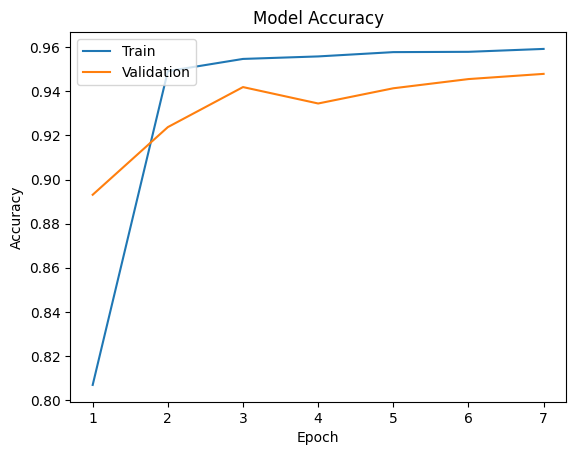

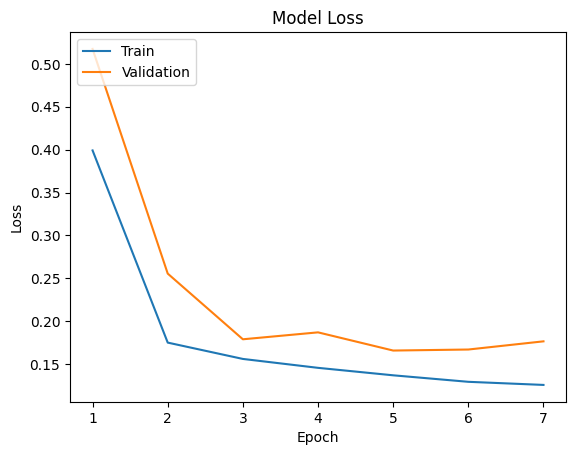

In [64]:
plotLearningCurve(history,7)